# Bayesian Inference

We now very briefly introduce the mechanics of Bayesian inference for a generic statistical inference problem.
The main goal is simply to introduce some notation and terminology. 

* Assume that we wish to perform inference about unknown quantities $\theta$ (parameters), from observed data
$x$. Bayesian inference proceeds as follows:

 1. Specify a __prior distribution__ $\pi(\theta)$ for $\theta$, which reflects our knowledge or uncertainty about
$\theta$ prior to observing the data $x$;

 2. Choose a __probability model__ $p(x|\theta)$ that reflects our beliefs about $x$ given $\theta$; 
 
 3. After observing data $\mathcal{D}_n=\{x_1,\cdots,x_n\}$, we update our beliefs and compute a __posterior distribution__ $p(\theta|\mathcal{D}_n)$ for $\theta$ using Bayes Theorem: 

 \begin{equation}
 p(\theta|x_1,\cdots,x_n) = \frac{p(x_1,\cdots,x_n|\theta) \pi(\theta)}{p(x_1,\cdots,x_n)}
 =\frac{\mathcal{L}_n(\theta)\pi(\theta)}{c_n}
 \propto \mathcal{L}_n(\theta)\pi(\theta)
 \end{equation}

 where $\mathcal{L}_n(\theta)=\prod_{i=1}^n p(x_i|\theta)$ is the __likelihood function__ and

 \begin{equation}
 c_n=p(x_1,\cdots,x_n)=\int p(x_1,\cdots,x_n|\theta) \pi(\theta) d\theta
 =\int \mathcal{L}_n(\theta)\pi(\theta) d\theta
 \end{equation}
  is the __normalizing constant__, which is also called __evidence__.


* Note that, when considered as a function of $\theta$, $p(x|\theta)$ is the likelihood function for $\theta$. This leads to a convenient way to verbalize Bayes theorem:  

 \begin{equation}
 \text{posterior $\propto$ likelihood $\times$ prior.}
 \end{equation}

 This verbalization also emphasizes that the posterior distribution results from combining the information in the data (likelihood) with external information (prior).


* We can get a __Bayesian point estimate__ by summarizing the center of the posterior. Typically, we use the mean or mode of the posterior distribution. 

  (The mode of a continuous/discrete probability distribution is the value x at which its probability density/mass  function has its maximum value, so the mode is at the peak.)
  
  The posterior mean is

 \begin{equation}
 \bar{\theta}=\int \theta p(\theta|\mathcal{D}_n)d\theta=
 \frac{\int \theta \mathcal{L}_n(\theta)\pi(\theta)d\theta}{\int \mathcal{L}_n(\theta)\pi(\theta)d\theta}
 \end{equation}


* We can also obtain a __Bayesian interval estimate__. For example, for $\alpha\in(0,1)$, we could find $a$ and $b$ such that

 \begin{equation}
 \int_{-\infty}^a p(\theta|\mathcal{D}_n)d\theta
 =\int_b^{\infty} p(\theta|\mathcal{D}_n)d\theta=\alpha/2
 \end{equation}

 Let $C=(a,b)$. Then,
 \begin{equation}
 \mathbb{P}(\theta\in C|\mathcal{D}_n)=\int_a^b p(\theta|\mathcal{D}_n)d\theta=1-\alpha
 \end{equation}

 so $C$ is a $1-\alpha$ __Bayesian posterior interval__ or __credible interval__. If $\theta$ has more than one dimension, the extension is straightforward and we obtain a __credible region__.


# Conjugate Prior

* Let $X\sim Bernoulli(\theta)$ and we have observed data $\mathcal{D}_n=\{x_1,\cdots,x_n\}$. Suppose we take the uniform distribution $\pi(\theta)=1$ as a prior. By Bayes' theorem, the posterior is 

 \begin{equation}
 p(\theta|\mathcal{D}_n)\propto \pi(\theta)\mathcal{L}_n(\theta)=
 \theta^s (1-\theta)^{n-s}=\theta^{s+1-1} (1-\theta)^{n-s+1-1}
 \end{equation}

 where $s=\sum_{i=1}^n x_i$ is the number of successes. Recall that a random variable $\theta$ on the interval $(0,1)$ has a Beta distribution with parameter $\alpha$ and $\beta$ if its density is 

 \begin{equation}
 \pi_{\alpha,\beta}(\theta)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1} (1-\theta)^{\beta-1}
 \end{equation}


* We see that the posterior distribution for $\theta$ is a Beta distribution with parameter $s+1$ and $n-s+1$. That is,

 \begin{equation}
 p(\theta|\mathcal{D}_n)=\frac{\Gamma(n+2)}{\Gamma(s+1)\Gamma(n-s+1)}
 \theta^{(s+1)-1} (1-\theta)^{(n-s+1)-1}.
 \end{equation}

 We write this as
 \begin{equation}
 \theta|\mathcal{D}_n\sim Beta(s+1, n-s+1)
 \end{equation}

 Notice that we have figured out the normalizing constant without actually doing the integral $\int \mathcal{L}_n(\theta)\pi(\theta)d\theta$. Since a density function integrates to one, we see that

 \begin{equation}
 \int_0^1 \theta^{s} (1-\theta)^{n-s}=\frac{\Gamma(s+1)\Gamma(n-s+1)}{\Gamma(n+2)}
 \end{equation}


* The mean of a $Beta(\alpha,\beta)$ distribution is $\frac{\alpha}{\alpha+\beta}$ so the Bayes posterior estimator is 

 \begin{equation}
 \bar{\theta}=\frac{s+1}{n+2}
 \end{equation}

 It is instructive to write $\bar{\theta}$ as

 \begin{equation}
 \bar{\theta}=\lambda_n\hat{\theta}+(1-\lambda_n)\tilde{\theta}
 \end{equation}

 where $\hat{\theta}=s/n$ is the maximum likelihood estimate, $\tilde{\theta}$ is the prior mean and $\lambda_n=n/(n+2)\approx 1$. 
 
 A 95 percent posterior interval can be obtained by numerically finding $a$ and $b$ such that $\int_a^b p(\theta|\mathcal{D}_n)d\theta=0.95$.

__ ======== Remarks ========__

* For this simple model, posterior mean converges to MLE as $n \rightarrow \infty$.

* Aside: MAP (mode of the posterior) maximizes weighted likelihood (weighted by the prior). It is the same as MLE if the prior is uniform. 

 \begin{equation}
 \theta_{MAP} = \arg\max_{\theta} \sum_i \log p(x_i | \theta) p\theta)
 \end{equation}




* ** The example showed how to compute the posterior distribution for $\theta$ using a uniform prior distribution. We saw that, conveniently, if the likelihood distribution is Bernoulli, the posterior distribution for $\theta$ is a Beta distribution. The property where the posterior distribution comes from the same family as the prior distribution is called “conjugacy”. Since the Bernoulli distribution is the special case for binomial distribution, generally speaking, we say “The Beta distribution is the conjugate prior distribution for the binomial proportion”. **


* Suppose that instead of a uniform prior, we use the prior $\theta\sim Beta(\alpha, \beta)$. If you repeat the calculations above, you will see that $\theta|\mathcal{D}_n\sim Beta(\alpha+s, \beta+n-s)$. The flat prior is just the special case with $\alpha=\beta=1$. The posterior mean in this more general case is 

 \begin{equation}
 \bar{\theta}=\frac{\alpha+s}{\alpha+\beta+n}=(\frac{n}{\alpha+\beta+n})\hat{\theta}
 +(\frac{\alpha+\beta}{\alpha+\beta+n})\theta_0
 \end{equation}
 where $\theta_0=\alpha/(\alpha+\beta)$ is the prior mean.


























## Exerciese

1. Show the prior is a Dirichlet distribution and the posterior is also a Dirichlet for Beta distribution. 
2. Show that the Gamma distribution is the conjugate prior for the Poisson distribution.

## Beta distributions

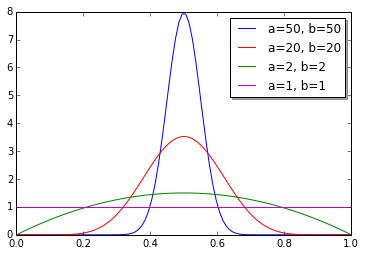

In [20]:
%matplotlib inline
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 1.0, 100)
y1 = beta.pdf(x, 50, 50)
y2 = beta.pdf(x, 10, 10)
y3 = beta.pdf(x, 2, 2)
y4 = beta.pdf(x, 1, 1)
fig, ax = plt.subplots()
ax.plot(x,y1, '-', label='a=50, b=50')
ax.plot(x,y2, 'r-', label='a=20, b=20')
ax.plot(x,y3, 'g-', label='a=2, b=2')
ax.plot(x,y4, 'm-', label='a=1, b=1')
legend = ax.legend(loc='upper right', shadow=True)

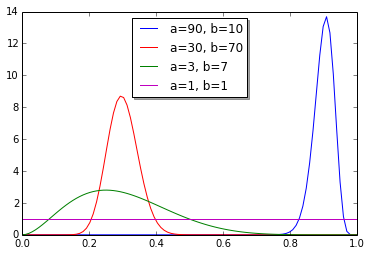

In [22]:
%matplotlib inline
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 1.0, 100)
y1 = beta.pdf(x, 90, 10)
y2 = beta.pdf(x, 30, 70)
y3 = beta.pdf(x, 3, 7)
y4 = beta.pdf(x, 1, 1)
fig, ax = plt.subplots()
ax.plot(x,y1, '-', label='a=90, b=10')
ax.plot(x,y2, 'r-', label='a=30, b=70')
ax.plot(x,y3, 'g-', label='a=3, b=7')
ax.plot(x,y4, 'm-', label='a=1, b=1')
legend = ax.legend(loc='upper center', shadow=True)

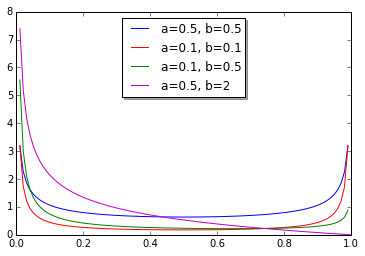

In [23]:
%matplotlib inline
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 1.0, 100)
y1 = beta.pdf(x, 0.5, 0.5)
y2 = beta.pdf(x, 0.1, 0.1)
y3 = beta.pdf(x, 0.1, 0.5)
y4 = beta.pdf(x, 0.5, 2)
fig, ax = plt.subplots()
ax.plot(x,y1, '-', label='a=0.5, b=0.5')
ax.plot(x,y2, 'r-', label='a=0.1, b=0.1')
ax.plot(x,y3, 'g-', label='a=0.1, b=0.5')
ax.plot(x,y4, 'm-', label='a=0.5, b=2')
legend = ax.legend(loc='upper center', shadow=True)


## Motivating Example

We use the toy example of estimating the bias of a coin given a sample consisting of $n$ tosses to illustrate the what we have got so far. Take a beta distribution as the prior, then the posterior distribution has a closed form solution. We give an example below with some general points:

1. Choose a prior distribtuiton (i.e. the beta here) as well as its parameters (here a=10, b=10). The prior distribution may be relatively uninformative (i.e. more flat) or inforamtive (i.e. more peaked)
2. The posterior depends on both the prior and the data. As the amount of data becomes large, the posterior approximates the MLE. An informative prior takes more data to shift than an uninformative one
3. Of course, it is also important the model used (i.e. the likelihood) is appropriate for the fitting the data
4. The mode of the posterior distribution is known as the maximum a posteriori (MAP) estimate (MLE which is the mode of the likelihood).

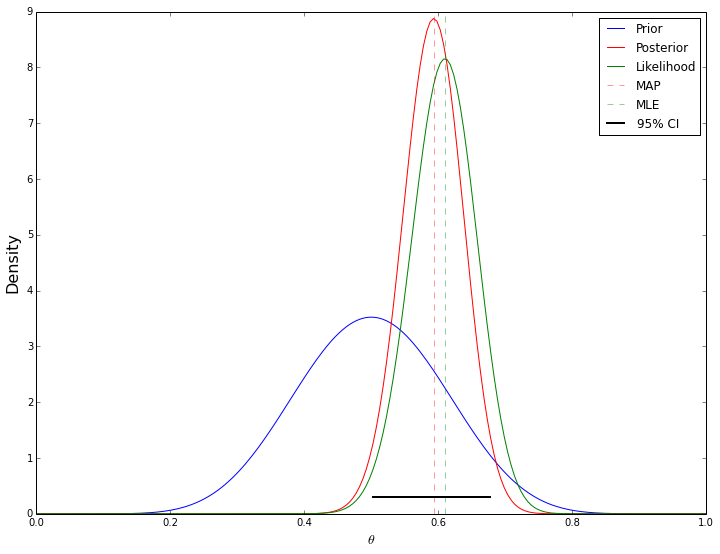

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

np.random.seed(1234)
n = 100
h = 61
p = h/n
rv = st.binom(n, p)
mu = rv.mean()

a, b = 10, 10
prior = st.beta(a, b)
post = st.beta(h+a, n-h+b)
ci = post.interval(0.95)

thetas = np.linspace(0, 1, 200)
plt.figure(figsize=(12, 9))
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.plot(thetas, n*st.binom(n, thetas).pmf(h), label='Likelihood', c='green')
plt.axvline((h+a-1)/(n+a+b-2), c='red', linestyle='dashed', alpha=0.4, label='MAP')
plt.axvline(mu/n, c='green', linestyle='dashed', alpha=0.4, label='MLE')
plt.xlim([0, 1])
plt.axhline(0.3, ci[0], ci[1], c='black', linewidth=2, label='95% CI');
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

#### Acknowledgement: https://github.com/stephens999/stat302